In [ ]:
!wget https://www.dropbox.com/sh/f16g37qoqepvtex/AACzZxbmxVcEPTUkCZ-V3oMPa?dl=0

In [ ]:
! unzip AACzZxbmxVcEPTUkCZ-V3oMPa?dl=0

In [3]:
!ls

'AACzZxbmxVcEPTUkCZ-V3oMPa?dl=0'     mobile_price_classification
 air_pollution_data		     movie_metadata.csv
 chemical_classifier		     movie_rating_prediction
'classify points'		     mushrooms.csv
 dibaties_data			     sample_data
 hard_work_pays_off_challenge_data   titanic_survival
 house_pred_chall		     weightedX.csv
 images				     weightedY.csv
 ml-100k			     xdata.csv
 mnist				     ydata.csv


In [73]:
import os
import shutil
os.listdir("images")

['cats', 'humans', 'horses', 'dogs']

In [6]:
img_fol = ["dogs","humans","cats","horses"]
for i in img_fol:
  print(i," ",len(os.listdir("images/"+i)))

dogs   202
humans   202
cats   202
horses   198


In [56]:
if not os.path.isdir("val_images"):
  os.mkdir("val_images")
classes = ["dogs","humans","cats","horses"] 
os.listdir()

['.config',
 'movie_metadata.csv',
 'house_pred_chall',
 'mushrooms.csv',
 'ml-100k',
 'xdata.csv',
 'val_images',
 'chemical_classifier',
 'movie_rating_prediction',
 'dibaties_data',
 'AACzZxbmxVcEPTUkCZ-V3oMPa?dl=0',
 'weightedX.csv',
 'images',
 'classify points',
 'weightedY.csv',
 'mnist',
 'mobile_price_classification',
 'hard_work_pays_off_challenge_data',
 'ydata.csv',
 'air_pollution_data',
 'titanic_survival',
 'sample_data']

In [75]:
for c in classes:
  p = os.path.join("val_images",c)
  if not os.path.isdir(p):
    os.mkdir(p)
os.listdir("val_images")    
split = 0.9
for f in os.listdir("images"):
    path = "images/" + f;
    imgs = os.listdir(path)

    split_size = int(split*len(imgs))
    files_to_move = imgs[split_size:]
    print(len(files_to_move))

    for img_f in files_to_move:
        src = os.path.join(path,img_f)
        dest = os.path.join("val_images/"+f,img_f)
        shutil.move(src,dest)
        # print(src)
        # print(dest)



21
21
20
21


In [91]:
img_fol = ["dogs","humans","cats","horses"]
print("Training Data")
for i in img_fol:
  print(i," ",len(os.listdir("images/"+i)))
print("Validation Data")
for i in img_fol:
  print(i," ",len(os.listdir("val_images/"+i)))

Training Data
dogs   181
humans   181
cats   181
horses   178
Validation Data
dogs   21
humans   21
cats   21
horses   20


In [82]:
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow
import keras

In [84]:
sample_path = "images/dogs/dog.10.jpg"
img = image.load_img(sample_path)
print(type(img))


<class 'PIL.JpegImagePlugin.JpegImageFile'>


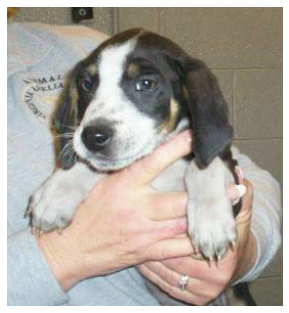

In [85]:
x = image.img_to_array(img)/255
plt.style.use("seaborn")
plt.axis("off")
plt.imshow(img)

In [104]:
## model
model = Sequential()
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation="softmax"))
model.add(Dense(4,activation="softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)      

In [105]:
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss = "categorical_crossentropy",optimizer=opt,metrics=["acc"])

In [106]:
train_gen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_gen.flow_from_directory(
    "images/",
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical"
    )
val_generator = train_gen.flow_from_directory(
    "val_images/",
    target_size=(150,150),
    batch_size=32,
    class_mode="categorical"
    )

Found 721 images belonging to 4 classes.
Found 83 images belonging to 4 classes.


In [107]:
x,y = train_generator.next()
print(x.shape,y.shape)

(32, 150, 150, 3) (32, 4)


In [ ]:
history = model.fit_generator(
    train_generator,
    epochs = 200,
    steps_per_epoch = 7,
    validation_data = val_generator,
    validation_steps = 2
)

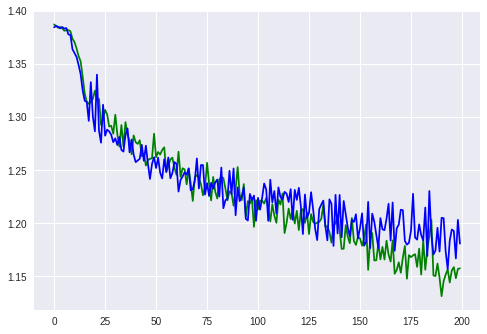

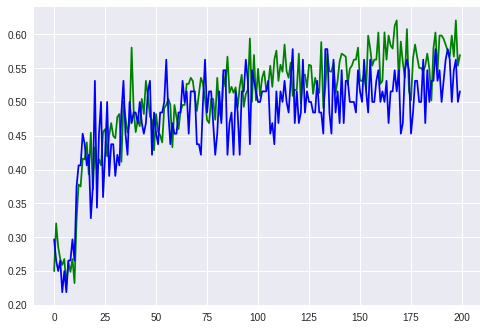

In [109]:
plt.figure(0)
plt.plot(history.history['loss'],'g')
plt.plot(history.history['val_loss'],'b')
plt.show()
plt.plot(history.history['acc'],'g')
plt.plot(history.history['val_acc'],'b')
plt.show()